# Análisis exploratorio del dataset Titanic
##### Práctica final del curso de análisis de datos con Python
Profesor: Gerardo Mathus

---
**Intrucciones: Lee cuidadosamente cada pregunta y escribe el código de Python necesario para contestar cada una.  Deberás contestar el examen en un Jupyter Notebook y, al terminar, deberás subirlo a un nuevo repositorio de github que contenga únicamente los datos a utilizar (ver liga de abajo) y el Jupyter Notebook con tus respuestas**

**Nota: Todas las visualizaciones deberán hacerse con `seaborn`.**

### 1. Importa los datos
Los datos los puedes descargar [de esta liga](https://drive.google.com/file/d/1Ru9l2gfDIyOjJnaor17dOPUGii5SK4mJ/view?usp=sharing) 

Enlace corto: http://tiny.cc/cn9idz

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
df = pd.read_csv('datos/titanic.csv')

### 2. Observa las  primeras filas de los datos

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. ¿Cuántas filas y columnas tiene el dataset?

In [4]:
df.shape

(891, 12)

In [5]:
print("Num columnas: {}, num filas: {}".format(df.shape[1], df.shape[0]))

Num columnas: 12, num filas: 891


### 4. ¿Qué columnas tiene el dataset?

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 5. Contesta las siguientes preguntas:
    a) ¿Cuántas variables son de tipo flotante?
    b) ¿Cuántas variables son de tipo entero?
    c) ¿Cuántas variables son de tipo objeto (categóricas)?
    d) ¿Qué columnas y tienen objetos en nulo o faltantes?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 6. Obten un resumen de estadisticos del dataset para contestar las siguientes  preguntas:
    a) ¿Cuál era la edad promedio de los pasajeros del Titanic?
    b) ¿De cuánto era el `fare` promedio?
    c) ¿Cuántos pasajeros sobrevivieron?

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print("a) Edad promedio de los pasajeros en el Titanic:",df.Age.mean())

a) Edad promedio de los pasajeros en el Titanic: 29.69911764705882


In [13]:
print("b) El fare promedio:",df.Fare.mean())

b) El fare promedio: 32.204207968574636


In [14]:
print("c) Los sobrevivientes del Titanic fueron:",df.Survived.sum())

c) Los sobrevivientes del Titanic fueron: 342


---

## Visualizaciones

### 7. Visualización para valores faltantes
#### Una buena forma visual de observar valores faltantes en columnas es mediante un mapa de calor. Utiliza la función `heatmap` de `seaborn` con  `cmap='flag'` para graficar valores faltantes en cada columna
#### ¿Qué puedes concluir de tu mapa de calor?

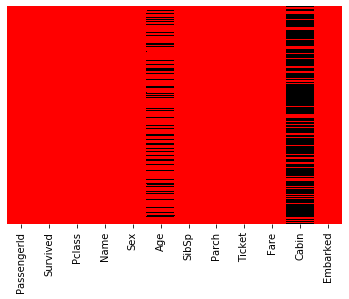

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='flag')

### 8. Grafica la matriz de correlación con la función `heatmap` de `seaborn` y los argumentos `cmap='YlGnBu'` y `annot=True`. Posteriormente describe qué hace cada uno de estos argumentos.
#### ¿Qué puedes concluir del mapa de calor de la matriz de correlación?

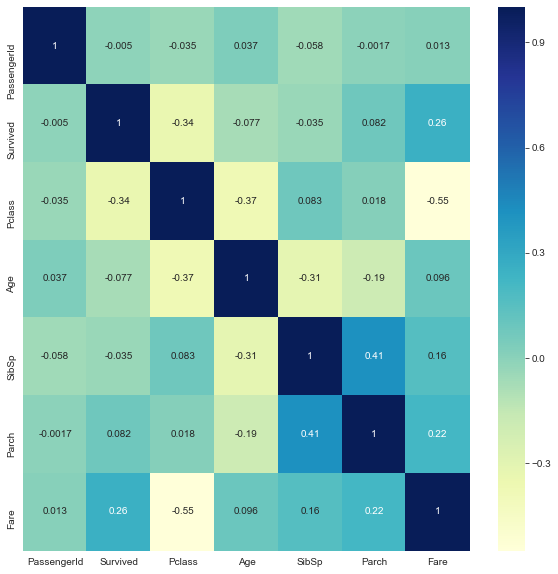

In [21]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

---

## Exploración de la variable `survived`
La variable `survived` indica si un pasajero subrevivió la tragedia del Titanic o no.
    * 0: No sobrevivió
    * 1: Sí sobrevivió
    
### 9. Haz una gráfica de barras que muestre la cantida de pasajeros que sobreviveron y que no sobreviveron. Utiliza la paleta `'Set1'`

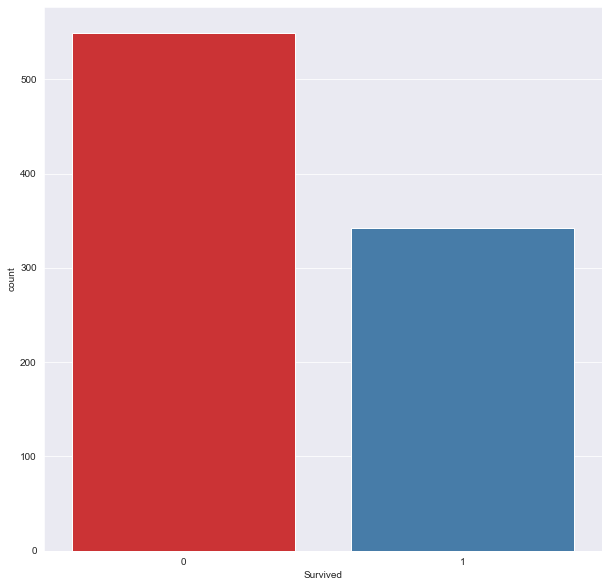

In [22]:
sns.countplot(df.Survived,palette="Set1")

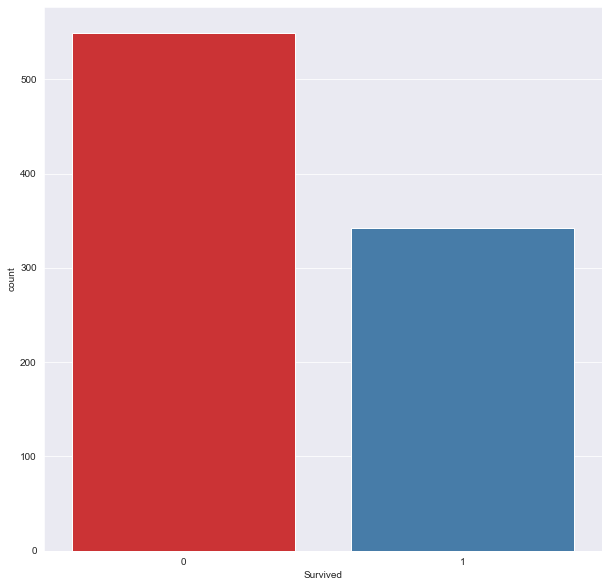

In [23]:
sns.countplot('Survived', data=df, palette='Set1')

### 10. Imprime el número exacto de pasajeros que sobreviveron y que no sobreviveron

In [24]:
survived=df.Survived.sum()
not_survived=(len(df.index)-survived)
print("Survived:",survived)
print("Not survived:",not_survived)

Survived: 342
Not survived: 549


In [25]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### 11. Haz una gráfica de barras de los pasajeros que sobreviveron y que no sobreviveron introducieron una tercera variable `Sex`. Utiliza la paleta `'Set2'`.
Deberás tener 4 barras: 2 barras (male, female) para 'no sobrevivó' y 2 barras (male, female) para 'sobrevivó

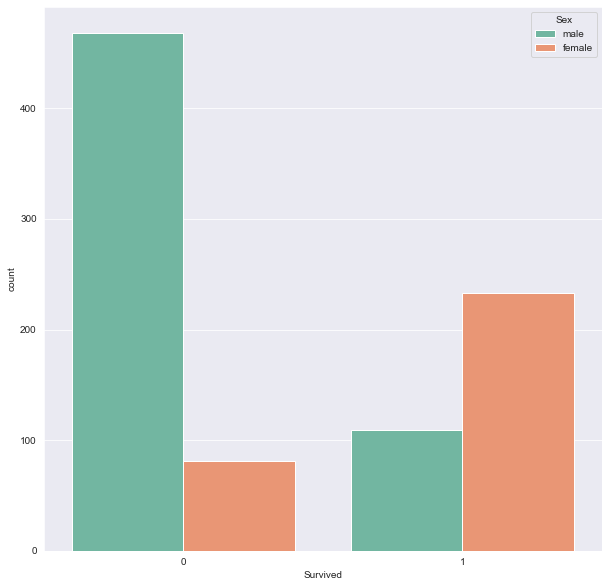

In [26]:
sns.countplot(df.Survived,hue=df.Sex, palette="Set2")

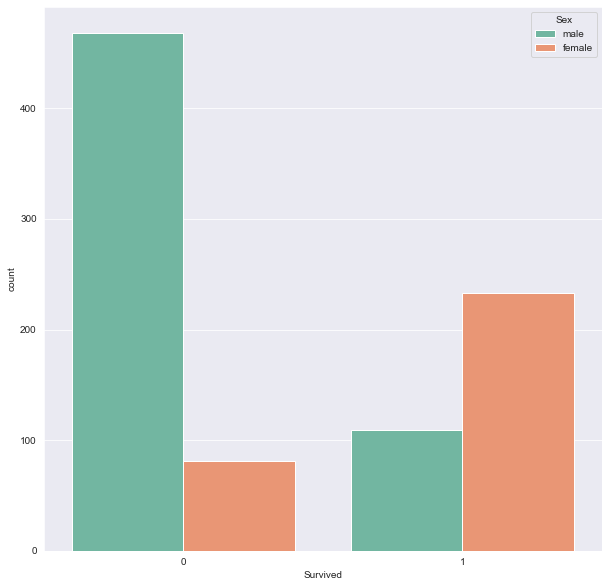

In [27]:
sns.countplot('Survived', data=df, hue='Sex', palette="Set2")

### 12. Haz una gráfica de barras de los pasajeros que sobreviveron y que no sobreviveron introducieron una tercera variable `Pclass`. Utiliza la paleta `'Set2'`.
La variable `Pclass` indica el estatus socioeconómico del pasajero:
- 1 $\rightarrow$ Upper (alta)
- 2 $\rightarrow$ Middle (media)
- 3 $\rightarrow$ Lower (baja)

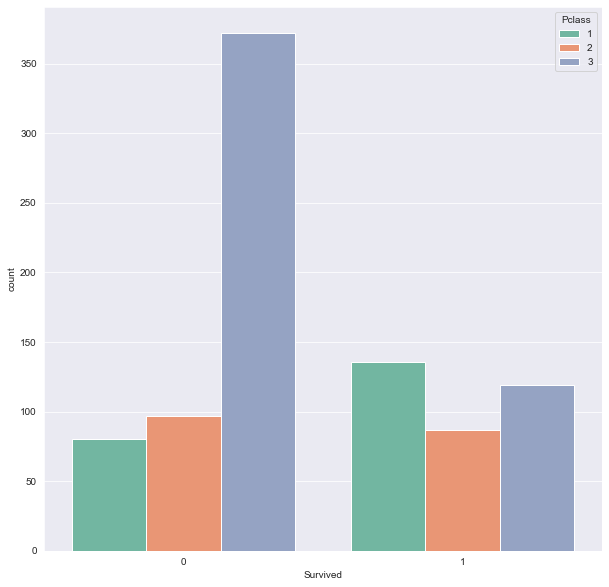

In [28]:
sns.countplot(df.Survived,hue=df.Pclass, palette="Set2")

### 13. Haz una gráfica de barras del número de la variable `SibSp` utilizando la paleta `'Set3'`.
La variable `SibSp` indica la cantida de hermanos del pasajero, y si tenía o no esposo o esposa.

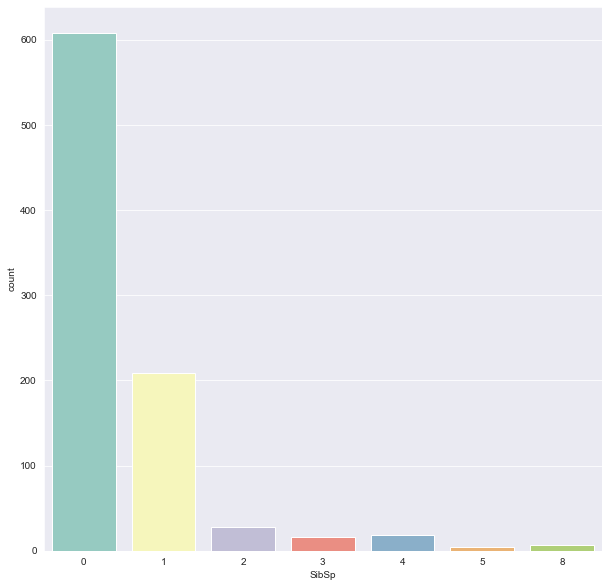

In [30]:
sns.countplot(data=df, x='SibSp', palette='Set3')

### 14. Haz lo mismo para la bariable `Parch`.
Esta variable indica el número de padres o madres e hijos que viajaban con el pasajero.

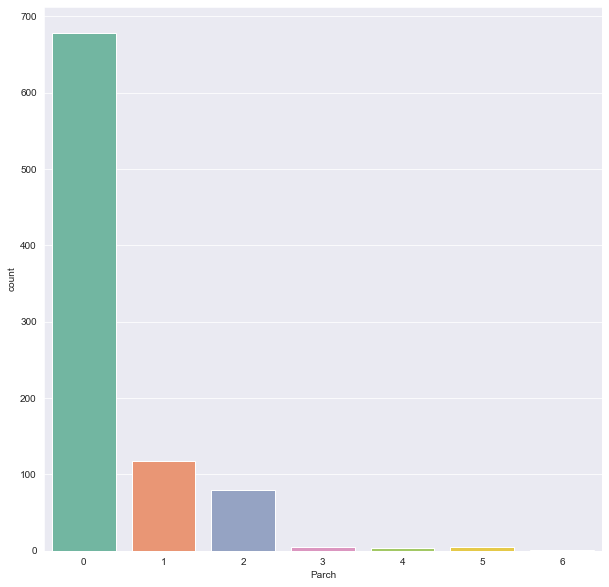

In [31]:
sns.countplot(data=df, x='Parch', palette='Set2')

### 15. Haz una gráfica de barras que muestre la cantidad de pasajeros que embarcaron en `C` (Cherbourg), `Q` (Queenstown) y `S` (Southampton). Utiliza la paleta que quieras

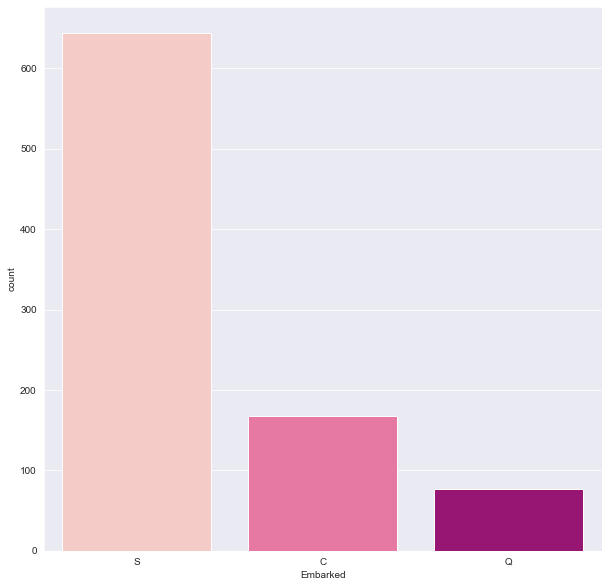

In [32]:
sns.countplot(df.Embarked, palette="RdPu")

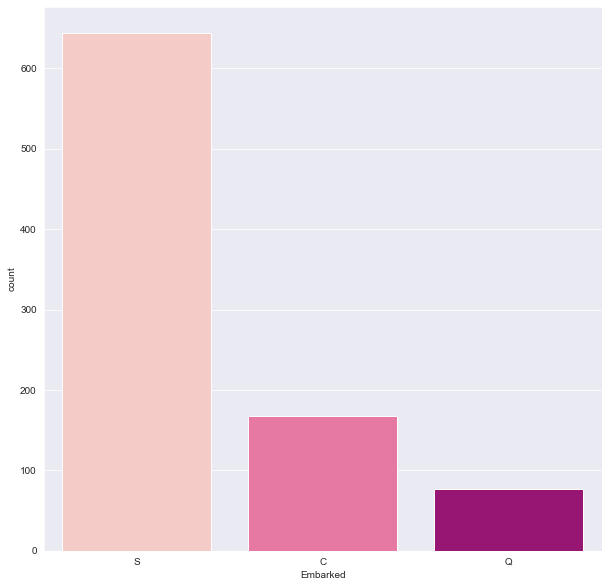

In [33]:
sns.countplot(data=df, x='Embarked', palette="RdPu")

### 16. Ejecuta el siguiente código y anota tus observaciones

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


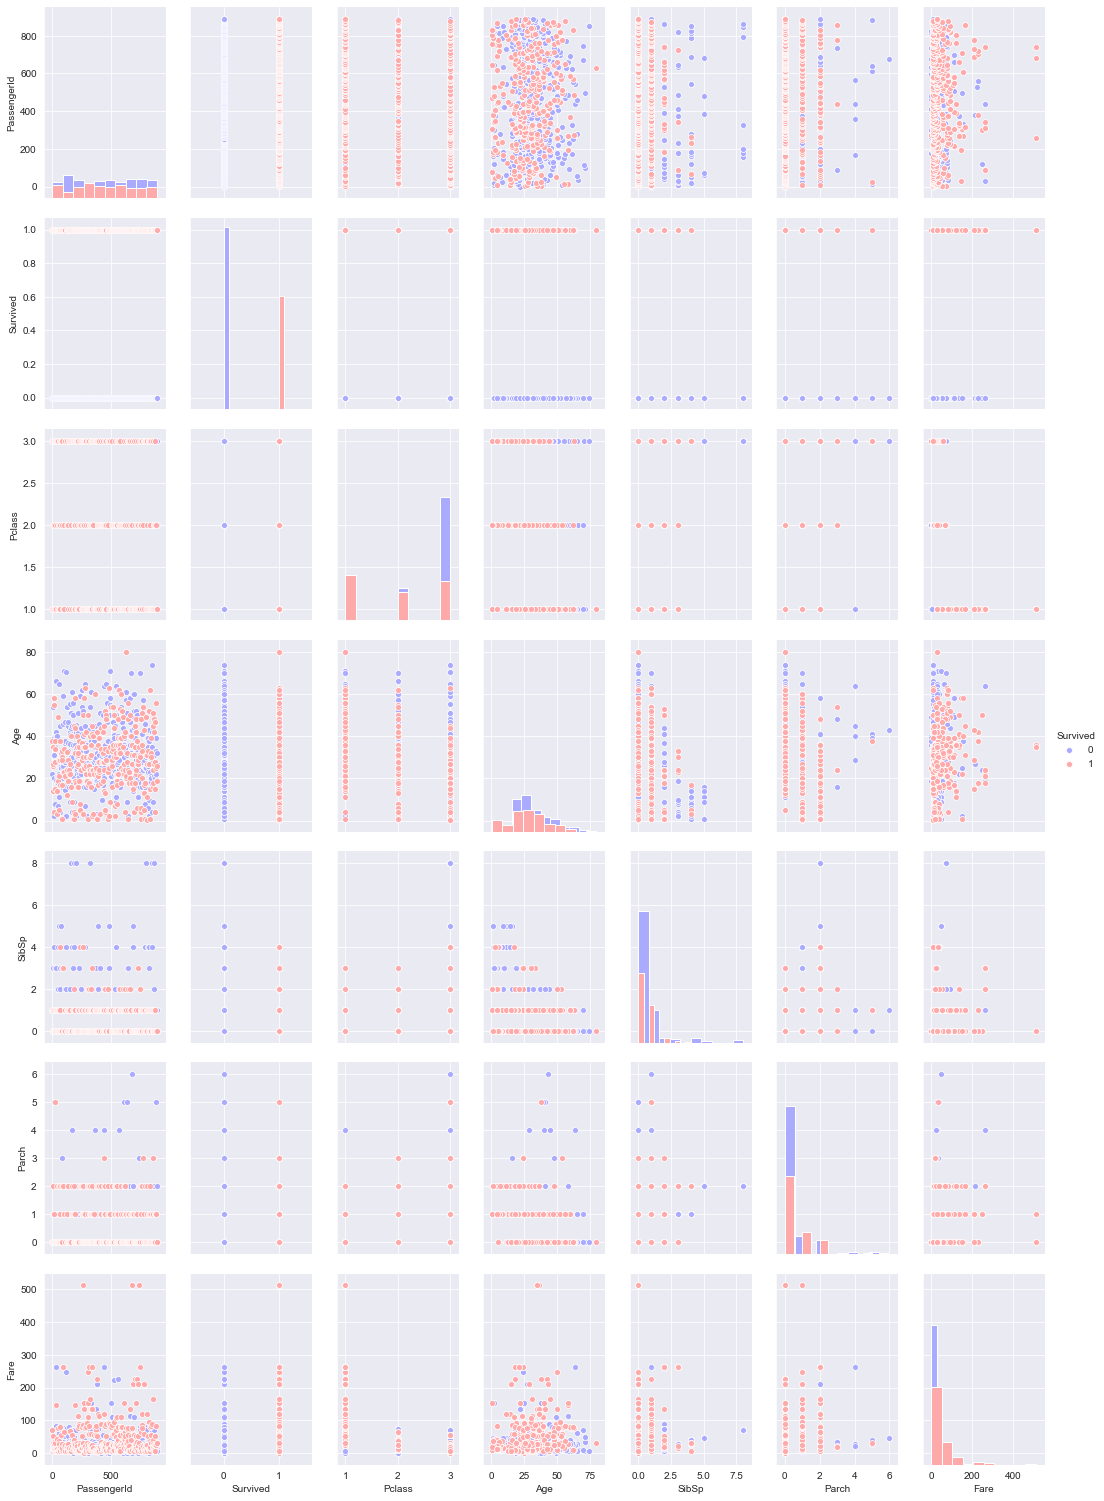

In [36]:
sns.pairplot(data=df, hue ='Survived', diag_kind='hist', height= 3, aspect=0.7,palette='bwr')

### 17.  Haz una gráfica de dispersión con un ajuste lineal, y después vuelve a realizar la misma gráfica pero ahora utilizando los parámetros `logistic=True` y `y_jitter=0.3`. Posteriormente describe para qué sirven estos parámetros

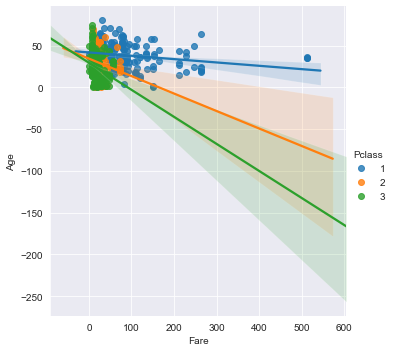

In [37]:
sns.lmplot(x='Fare', y='Age', hue="Pclass", data=df)

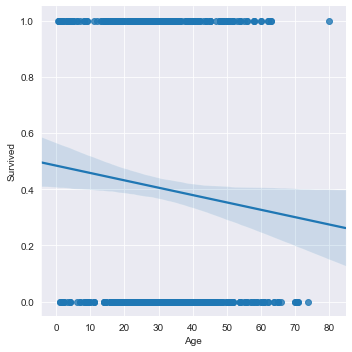

In [39]:
sns.lmplot(x='Age', y='Survived', data=df)

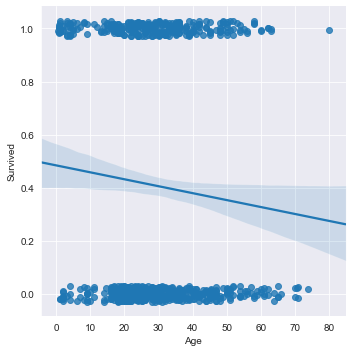

In [41]:
sns.lmplot(x='Age', y='Survived', data=df, y_jitter=.03)

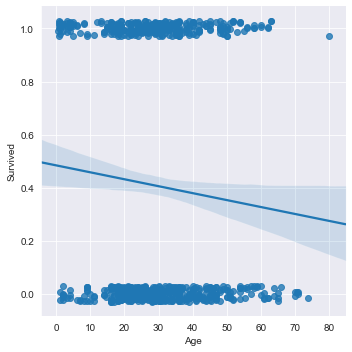

In [47]:
sns.lmplot(x='Age', y='Survived', data=df, y_jitter=.03)

### 18. Crea un histograma de la variable `Age` utilizando 10, 20,30,40 y 50 cubetas (bins)

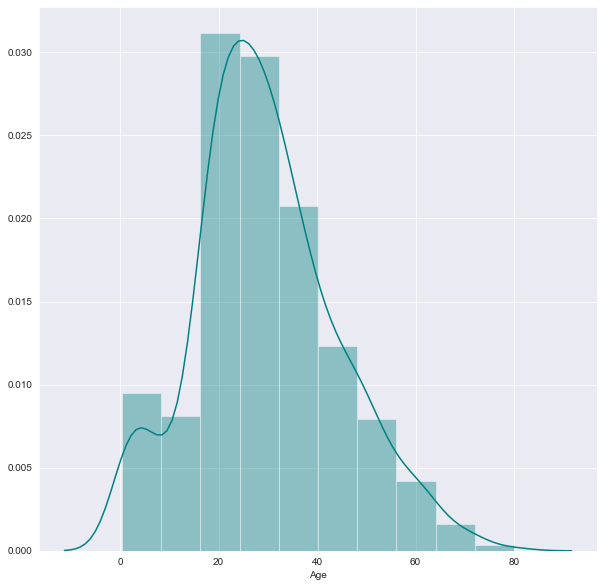

In [49]:
sns.distplot(df.Age.dropna(), bins=10, color='teal')

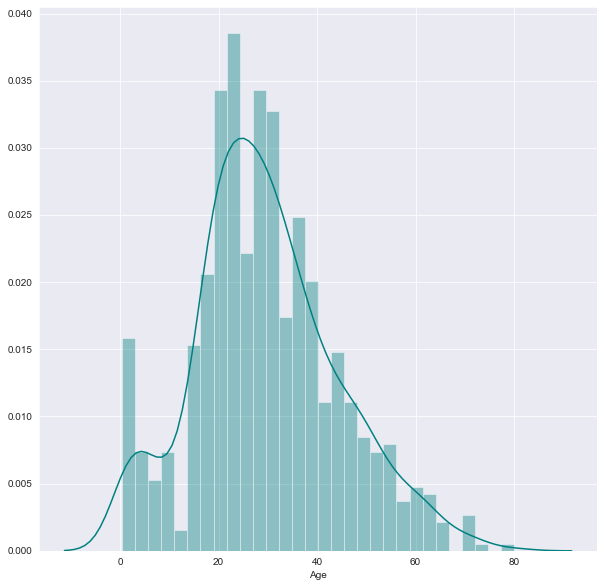

In [50]:
sns.distplot(df.Age.dropna(), bins=30, color='teal')

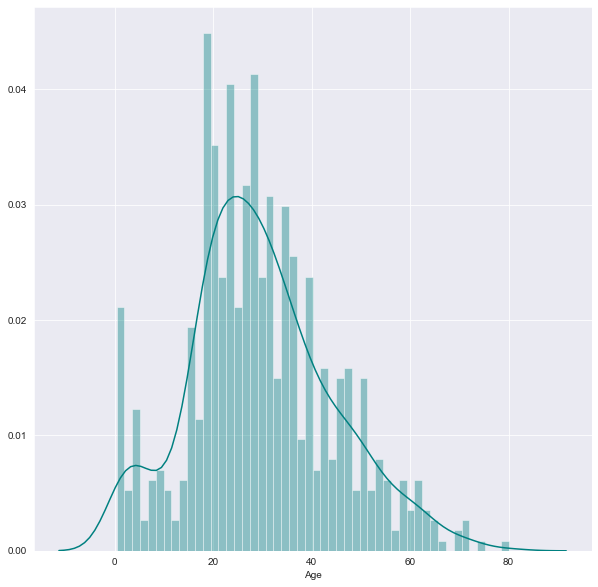

In [62]:
sns.distplot(df.Age.dropna(), bins=50, color='teal')

### 19. Crea un histograma de la variable `Fare`. Deberás utilizar la función `dropna()` para elminar valores nulos. Utiliza el color `'darkred'` y experimenta con el número de cubetas hasta que estes satisfecha.

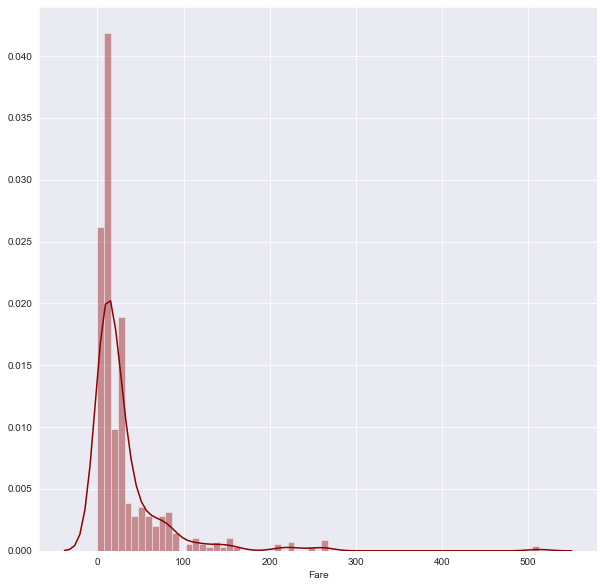

In [60]:
sns.distplot(df.Fare.dropna(), color='darkred', bins=65)

### 20. Crea un *boxplot* de `Pclass` contra `Age` utilizando la paleta `'plasma'` y contesta las siguientes preguntas:
Sin tomar en cuenta *outliers*:
1. En la clase 1, ¿más o menos cuál edad mediana (cuartil 50) de los parajeros?
2. En la clase 2, ¿más o menos cuál es la edad máxima de los pasajeros?
3. En la clase 3, ¿más o menos cuál es la edad en el primer cuartil de los pasajeros?

¿Tus hallazgos coinciden con lo que da la función `describe()` de `pandas`?

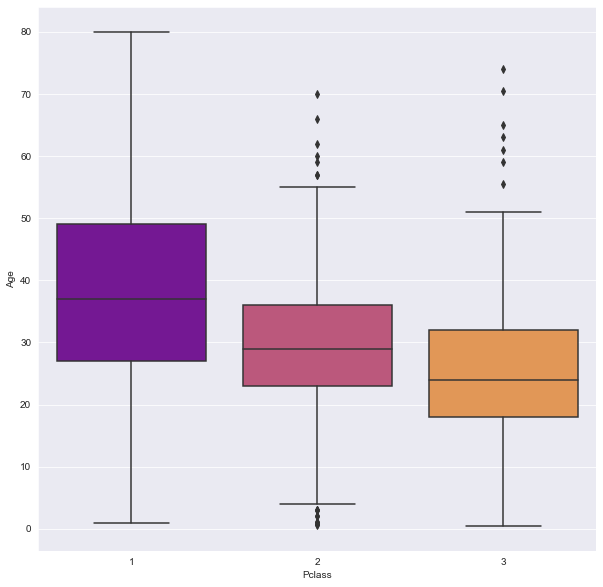

In [54]:
sns.boxplot(x='Pclass', y='Age', data=df, palette='plasma')

In [56]:
#38
#56
#18
df[df.Pclass==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [57]:
df[df.Pclass==2].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,184.000000,184.000000,184.0,173.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2.0,29.877630,0.402174,0.380435,20.662183
std,250.852161,0.500623,0.0,14.001077,0.601633,0.690963,13.417399
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,234.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,435.500000,0.000000,2.0,29.000000,0.000000,0.000000,14.250000
75%,668.000000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


In [58]:
df[df.Pclass==3].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


### 21. Haz un *boxplot* de la variable `Fare` para detectar/visualizar *outliers*. Utiliza la paleta `Blues`

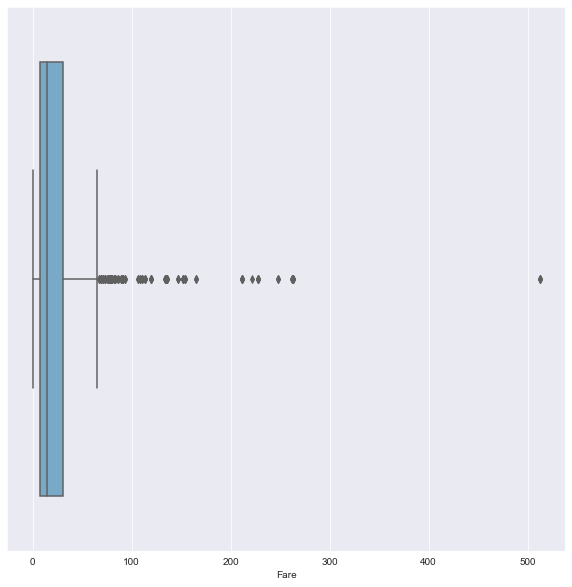

In [63]:
sns.boxplot(x='Fare', data=df, palette='Blues')

### 22. Haz un *boxplot* de la variable `Age` para detectar/visualizar *outliers*. Utiliza la paleta `Blues`

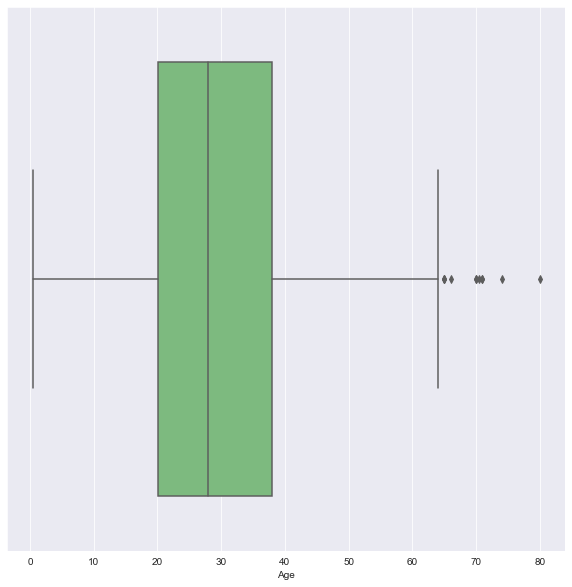

In [64]:
sns.boxplot(df.Age.dropna(), palette='Greens')